In [103]:
#Librerias necesarias para la exploracion de datos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
#Cargo el archivo proporcionado por Vozy

df = pd.read_csv(r"src/Empresa X Info Septiembre 2023.csv", sep=";")

In [105]:
# exploro la informacion de las columnas y los tipos de datos que tiene

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28391 entries, 0 to 28390
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   session_id                 28391 non-null  object 
 1   date                       28391 non-null  object 
 2   hour                       28391 non-null  object 
 3   Contacted                  28391 non-null  bool   
 4   Answered                   28391 non-null  bool   
 5   contact_confirmed          28391 non-null  bool   
 6   contactability_type        2326 non-null   object 
 7   engagement                 28391 non-null  bool   
 8   Success                    28391 non-null  bool   
 9   success_type               339 non-null    object 
 10  retention                  28391 non-null  bool   
 11  recall                     28391 non-null  bool   
 12  recall_type                100 non-null    object 
 13  call_fallback              28391 non-null  boo

In [108]:
# Elimino las columnas que no tengan ningun tipo de registro

df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28391 entries, 0 to 28390
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   session_id                28391 non-null  object 
 1   date                      28391 non-null  object 
 2   hour                      28391 non-null  object 
 3   Contacted                 28391 non-null  bool   
 4   Answered                  28391 non-null  bool   
 5   contact_confirmed         28391 non-null  bool   
 6   contactability_type       2326 non-null   object 
 7   engagement                28391 non-null  bool   
 8   Success                   28391 non-null  bool   
 9   success_type              339 non-null    object 
 10  retention                 28391 non-null  bool   
 11  recall                    28391 non-null  bool   
 12  recall_type               100 non-null    object 
 13  call_fallback             28391 non-null  bool   
 14  fallba

In [110]:
# Veo si alguna columna solo tiene un tipo de valor. 

unique_value_counts = df.nunique()
unique_value_counts = unique_value_counts.sort_index()
unique_value_counts

Answered                        2
CampaignName                   14
Cantidad                     8503
Comentario no pago            122
Compromiso pago                 5
ContactID                   22358
Contacted                       2
Divisa                          1
Fecha máxima                  350
HangUPCause                     9
LastNode                       20
Límite días                     2
Phone                        8292
Producto                        1
Slot para buzones de voz      139
Success                         2
affirmations_contact            8
affirmations_pay                7
alreadypaid                     4
automatic_flow                  1
automatic_flow_start            1
call_fallback                   2
callorigin                      8
contact_confirmed               2
contactability_type             5
date                           15
dates                          41
denials_contact                 5
denials_pay                     8
duration      

In [111]:
# Hay columnas que no tienen valores nulos pero solo tienen un registro unico. Observo cual es, para ver si es reelevante.

automatic_flow = df["automatic_flow"].unique()
automatic_flow

array([False])

In [112]:
automatic_flow_start = df["automatic_flow_start"].unique()
automatic_flow_start

array([False])

In [113]:
voicemail = df["voicemail"].unique()
voicemail

array([nan, True], dtype=object)

In [114]:
Divisa = df["Divisa"].unique()
Divisa

array(['Dolares', nan], dtype=object)

In [115]:
Producto = df["Producto"].unique()
Producto

array(['Caaja Chiica', nan], dtype=object)

In [116]:
#Elimino las columnas que solo tiene un registro unico, no aportan información reelevante para el analisis.

df_clean = df.drop(columns=["automatic_flow", "automatic_flow_start", "voicemail", "Divisa", "Producto"])

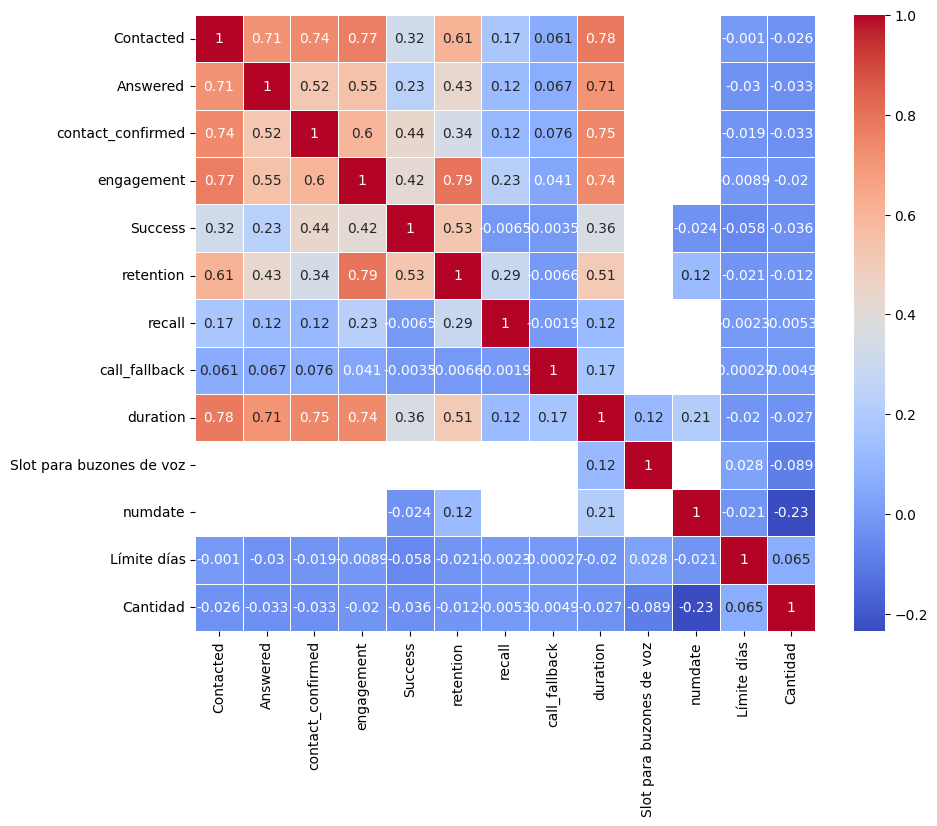

In [117]:
# Observo la correlación entre las variables numéricas y booleanas, con el fin de eliminar informacion redundante

numeric_columns = df_clean.select_dtypes(include=['int64', 'float64', 'bool'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.show()


1. El cliente X espera tener acuerdos de pago por valor de 8.000.000 de Pesos, basado en tu análisis de los datos el mes de Septiembre fue un mes en el que se cumplio el objetivo, fue bueno, malo, por que?

In [118]:
# Obtengo los registros con compromiso de pago y chequeo el monto total

columnas_objetivo_acuerdos = ['session_id', 'date', 'hour', 'success_type', 'Phone', ]
objetivo_acuerdos = df_clean
con_compromiso = df_clean[df_clean['success_type'] == "Compromiso pago"]
total_acuerdos_septiembre = con_compromiso["Cantidad"].sum()
total_acuerdos_septiembre

# el objetivo de 8.000.000 de Pesos se cumplió (10285458.979999999) para septiembre.

10285458.979999999

2. Cual es el valor promedio de acuerdos de pago por usuario único para el mes de septiembre?

3. El cliente espera tener un 35% de contestación durante el mes de septiembre, según tu análisis cual fue el resultado de este ítem? Fue bueno o malo? y por que?

4. De las llamadas contestadas se espera que al menos el 50% sean titulares, cuéntanos en el mes de septiembre, según tu análisis como estuvo este resultado?

5. Según tu análisis, Cuales son las horas en las que mas se realizan llamadas, en las que mas se contestan llamadas y en las que hay mas efectividad?

6. Cuales son los dos días de la semana mas efectivos para realizar las gestiones?

7. Porcentualmente cuales son los motivos de cuelgue en las llamadas?

8. Cuales son los nodos en los que están terminando las llamadas no exitosas, pero que son contestadas.

In [ ]:
df_porcentaje_contestacion = df[["session_id", 
                                 "Contacted", 
                                 "Answered",
                                 "contact_confirmed"
                                 "contactability_type",
                                 "Success",
                                 "retention",
                                 "recall",
                                 ]]


In [ ]:
df_porcentaje_contestacion.info()

In [ ]:
df_porcentaje_contestacion['Contacted'] = df_porcentaje_contestacion['Contacted'].astype(int)

In [ ]:
# Calcula el porcentaje de contestación
total_llamadas = len(df_porcentaje_contestacion)  # Número total de llamadas
llamadas_contestadas = len(df_porcentaje_contestacion[df_porcentaje_contestacion["Contacted"] == 1])  # Número de llamadas contestadas
porcentaje_contestacion = (llamadas_contestadas / total_llamadas) * 100
porcentaje_contestacion

# importa con voice mail? hay recalls?

4